In [5]:
from pytrends.request import TrendReq

# create a pytrends object. request data from Google Trends
pytrends = TrendReq(hl='en-US')

# extract data about keywords
keywords = ['Python','R', 'C++', 'Java', 'HTML']
pytrends.build_payload(keywords, timeframe='today 5-y')

# specify and get data
data = pytrends.interest_over_time()
data = data.drop('isPartial', axis=1)
data

,Python,R,C++,Java,HTML
date,,,,,
2016-03-27,15,60,79,36,17
2016-04-03,15,61,83,37,17
2016-04-10,15,62,81,39,18
2016-04-17,16,61,79,37,18
2016-04-24,15,60,82,38,17
...,...,...,...,...,...
2021-02-14,23,50,87,20,10
2021-02-21,22,50,89,20,11
2021-02-28,23,49,86,20,11


In [3]:
type(data)

pandas.core.frame.DataFrame

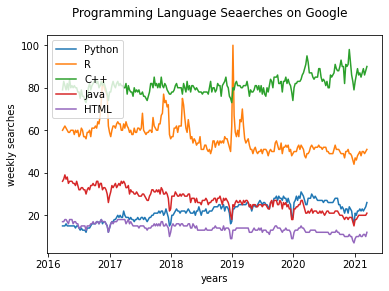

In [11]:
# plot data
import matplotlib.pyplot as plt

plt.plot(data)

# add title
plt.suptitle('Programming Language Seaerches on Google')
plt.xlabel('years')
plt.ylabel('weekly searches')

# add legend
plt.legend(keywords, loc='upper left')
plt.savefig('data.png')

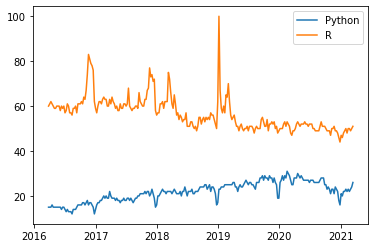

In [12]:
# analyze data
focus = ['Python', 'R']

plt.plot(data[focus])
plt.legend(focus)

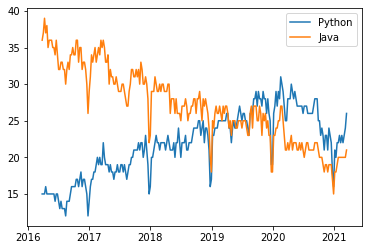

In [13]:
# analyze data
focus = ['Python', 'Java']

plt.plot(data[focus])
plt.legend(focus)

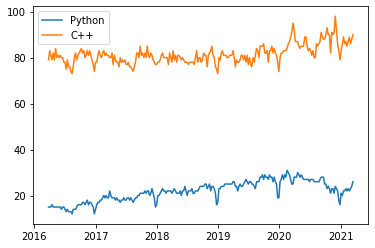

In [14]:
# analyze data
focus = ['Python', 'C++']

plt.plot(data[focus])
plt.legend(focus)

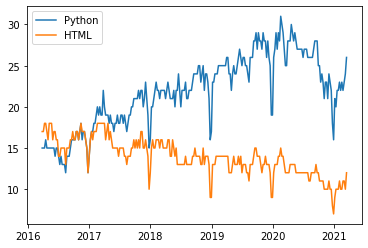

In [15]:
# analyze data
focus = ['Python', 'HTML']

plt.plot(data[focus])
plt.legend(focus)

In [17]:
# extract country-level data about the keywords
data2 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

# get countries with the most searches of 'Python' over the years
data2 = data2['Python'].nlargest(10)
data2

geoName
China          48
Israel         33
St. Helena     27
Singapore      22
South Korea    22
Russia         20
Estonia        19
Hong Kong      19
Iceland        19
Taiwan         19
Name: Python, dtype: int32

In [18]:
type(data2)

pandas.core.series.Series

In [19]:
# convert to DataFrame
data2 = data2.to_frame()
data2

,Python
geoName,
China,48
Israel,33
St. Helena,27
Singapore,22
South Korea,22
Russia,20
Estonia,19
Hong Kong,19
Iceland,19


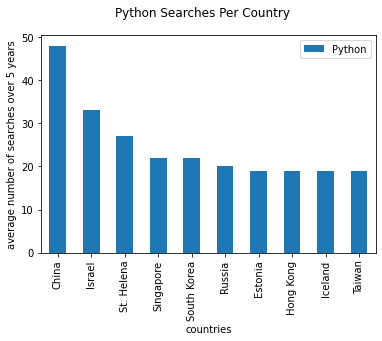

In [21]:
# plot bar chart with Pandas
data2.plot(kind='bar')

# add titles
plt.suptitle('Python Searches Per Country')
plt.xlabel('countries')
plt.ylabel('average number of searches over 5 years')

plt.show()

In [23]:
# plot a bar chart with multiple keywords
data3 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
data3 = data3[55:60]
data3


,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,17,14,34,23,12
Curaçao,8,32,47,6,7
Cyprus,12,22,43,13,10
Czechia,14,22,41,14,9
Côte d’Ivoire,5,15,51,23,6


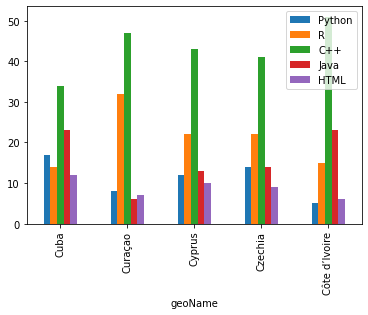

In [24]:
data3.plot(kind='bar')